# CS:GO Player Count Analysis
Calculate daily average player count for the last year and visualize it.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Read the player count data
df = pd.read_csv('csgo_player_count.csv', sep=';')
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Filter to last 1 year
one_year_ago = datetime.now() - timedelta(days=365)
df = df[df['DateTime'] >= one_year_ago]

print(f"Data filtered to last year: {len(df):,} records")
print(f"Date range: {df['DateTime'].min()} to {df['DateTime'].max()}")

Data filtered to last year: 1,916 records
Date range: 2024-10-04 00:00:00 to 2025-10-03 19:20:00


In [6]:
# Extract date (without time) and calculate daily average
df['Date'] = df['DateTime'].dt.date
daily_avg = df.groupby('Date')['Players'].mean().reset_index()
daily_avg.columns = ['Date', 'Average_Players']
daily_avg['Date'] = pd.to_datetime(daily_avg['Date'])

print(f"\nDaily averages calculated: {len(daily_avg)} days")
print(daily_avg.head(10))


Daily averages calculated: 365 days
        Date  Average_Players
0 2024-10-04        1322412.0
1 2024-10-05        1363110.0
2 2024-10-06        1462028.0
3 2024-10-07        1363872.0
4 2024-10-08        1400121.0
5 2024-10-09        1395317.0
6 2024-10-10        1346127.0
7 2024-10-11        1368886.0
8 2024-10-12        1498661.0
9 2024-10-13        1457406.0


In [7]:
# Save to CSV
daily_avg.to_csv('csgo_daily_avg_players_last_year.csv', index=False)
print("Saved to: csgo_daily_avg_players_last_year.csv")

Saved to: csgo_daily_avg_players_last_year.csv


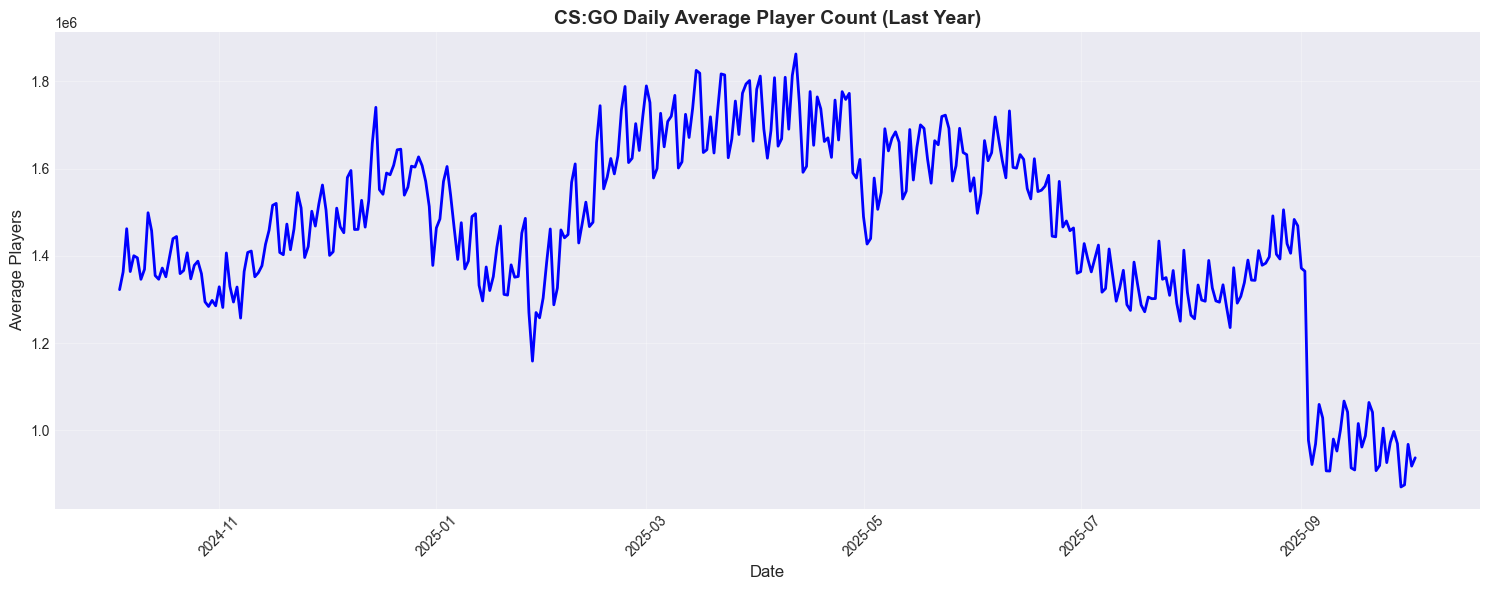

In [8]:
# Plot the chart
plt.figure(figsize=(15, 6))
plt.plot(daily_avg['Date'], daily_avg['Average_Players'], linewidth=2, color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Players', fontsize=12)
plt.title('CS:GO Daily Average Player Count (Last Year)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()